<a href="https://colab.research.google.com/github/abkimc/CV-course-test-prepration/blob/main/Image_processing_lecture_1_%2B_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

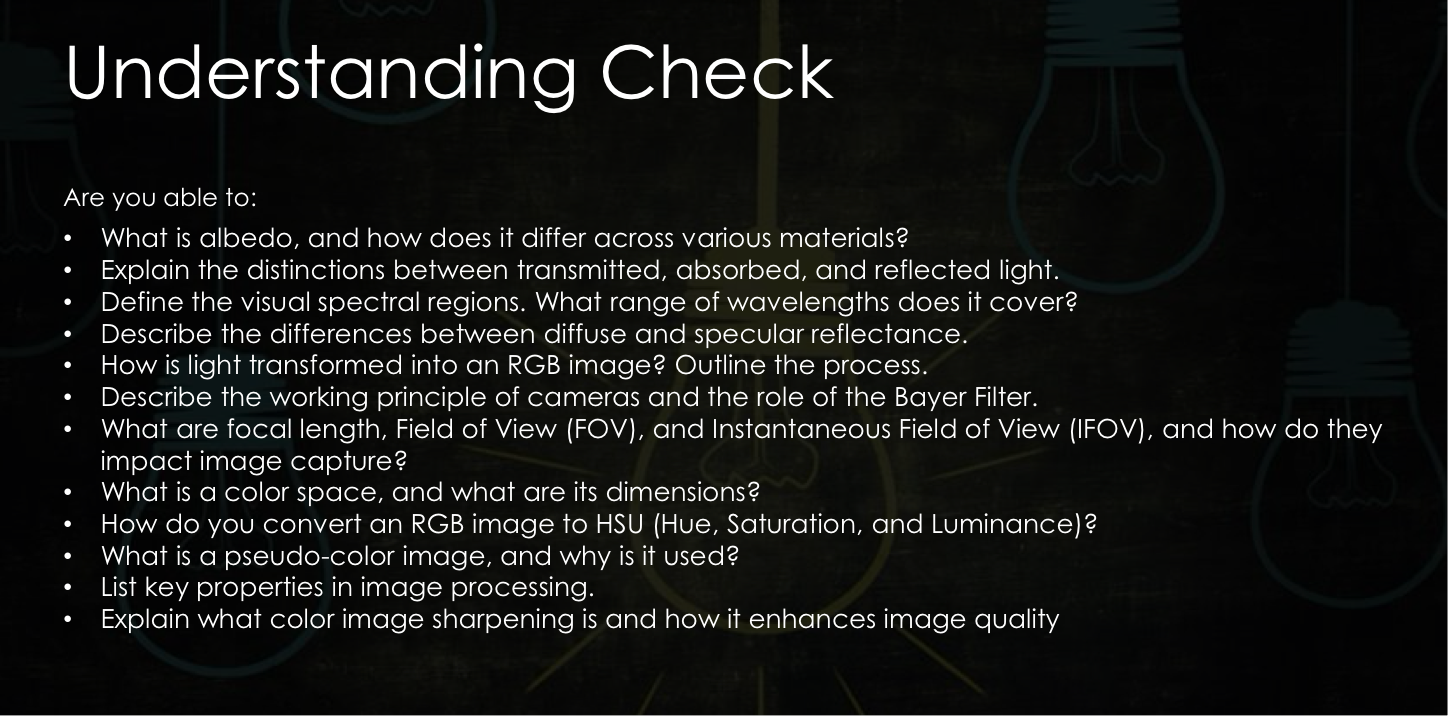

In [ ]:
# what is albedo and how it differs? - the amount of light that that is reflected by of an object - black 0 - white - 1

In [ ]:
# distinctions between transmitted absorbed and reflected light - transmitted the light from the sun, absorbed - the amont of light that an object retain, reflected the amount of light that an object returns -

In [ ]:
# the visual spectrun is between 380 and 750 nm  and ranges from violet and red

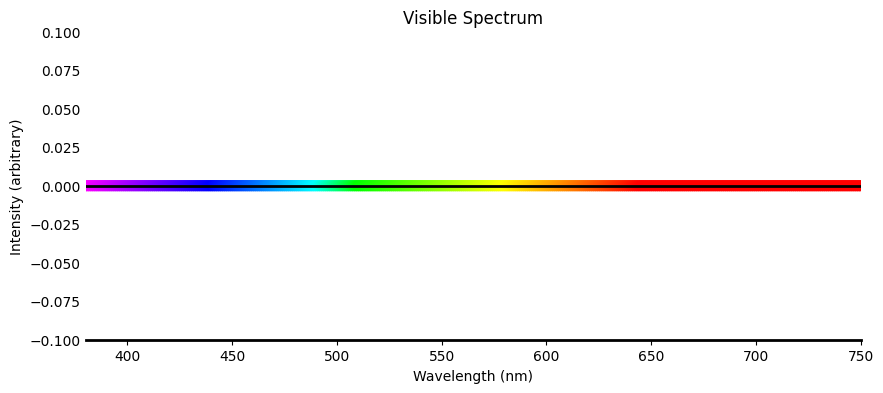

In [9]:
# prompt: create a plot of the visual spectrun is between 380 and 750 nm  and ranges from violet and red

import matplotlib.pyplot as plt
import numpy as np

# Wavelength range (nm)
wavelengths = np.linspace(380, 750, 400)

# Create a colormap that transitions from violet to red
colors = []
for wavelength in wavelengths:
  if 380 <= wavelength < 440:
    R = -(wavelength - 440) / (440 - 380)
    G = 0.0
    B = 1.0
  elif 440 <= wavelength < 490:
    R = 0.0
    G = (wavelength - 440) / (490 - 440)
    B = 1.0
  elif 490 <= wavelength < 510:
    R = 0.0
    G = 1.0
    B = -(wavelength - 510) / (510 - 490)
  elif 510 <= wavelength < 580:
    R = (wavelength - 510) / (580 - 510)
    G = 1.0
    B = 0.0
  elif 580 <= wavelength < 645:
    R = 1.0
    G = -(wavelength - 645) / (645 - 580)
    B = 0.0
  elif 645 <= wavelength <= 750:
    R = 1.0
    G = 0.0
    B = 0.0
  else:
    R = 0.0
    G = 0.0
    B = 0.0
  colors.append((R, G, B))

# Plot the spectrum
plt.figure(figsize=(10, 4))
plt.plot(wavelengths, np.zeros_like(wavelengths), color='black', linewidth=2)
plt.scatter(wavelengths, np.zeros_like(wavelengths), c=colors, s=50)

# Customize the plot
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (arbitrary)")
plt.title("Visible Spectrum")
plt.xlim(380, 750)
plt.ylim(-0.1, 0.1) # Set ylim for better visualization

# Remove ticks and spines for cleaner look
plt.tick_params(axis='y', which='both', length=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)


plt.show()

In [ ]:
# diffuse vs specular reflectance - specular reflectance - occurs when parallel rays of light are reflected off a very smooth surface and therefore reflect at the same angle, diffuse - rays of light are reflected off in am manner that spread the lreplected  rays in many angles

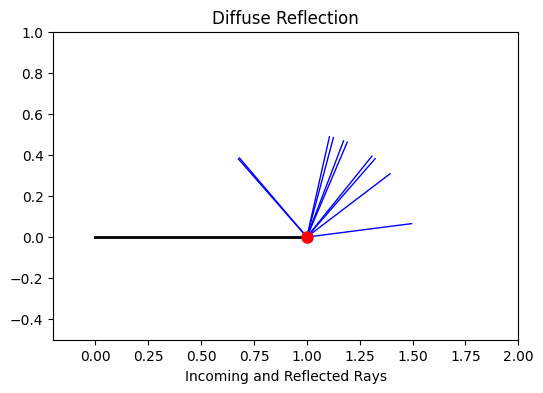

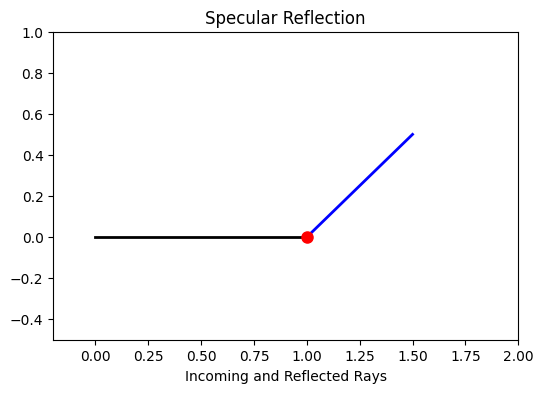

In [10]:
# prompt: plot a diagram ilustraing that diffuse vs specular reflectance - specular reflectance - occurs when parallel rays of light are reflected off a very smooth surface and therefore reflect at the same angle, diffuse - rays of light are reflected off in am manner that spread the lreplected  rays in many angles

import matplotlib.pyplot as plt
import numpy as np

# Diffuse Reflection
plt.figure(figsize=(6, 4))
plt.title("Diffuse Reflection")
x_diffuse = [0, 1]
y_diffuse = [0, 0]

# Simulate diffuse reflection with multiple scattered rays
for i in range(10):
    angle = np.random.uniform(0, np.pi)
    plt.plot([1, 1 + 0.5*np.cos(angle)], [0, 0.5*np.sin(angle)], color='blue', linewidth=1)

plt.plot(x_diffuse,y_diffuse, color='black', linewidth=2) #Incoming rays
plt.plot(1,0, marker='o', markersize=8, color='red') # Surface
plt.xlim(-0.2, 2)
plt.ylim(-0.5, 1)
plt.xlabel("Incoming and Reflected Rays")
plt.ylabel("")
plt.show()


# Specular Reflection
plt.figure(figsize=(6, 4))
plt.title("Specular Reflection")

# Simulate Specular Reflection
angle = np.pi/4  # Example angle of incidence
x_specular = [0,1]
y_specular = [0,0]
plt.plot(x_specular, y_specular, color='black', linewidth=2) # Incoming ray
plt.plot([1,1.5], [0,np.tan(angle)*0.5], color='blue', linewidth=2)  # Reflected ray

plt.plot(1,0, marker='o', markersize=8, color='red') # Surface

plt.xlim(-0.2,2)
plt.ylim(-0.5,1)
plt.xlabel("Incoming and Reflected Rays")
plt.ylabel("")
plt.show()

In [ ]:
# light into rgb - digital sensor -  Bayer pattern , de bayering , arrays of eachh color chanal , image bulding

In [ ]:
# focal length - the distance between the lens or other optical elements and the point where the light converges , field of view the ize in degrees, instantaneous field of view - the pixel size in real life

In [ ]:
# color space - the combinations that can create all colors, depanding on the type  - red, blue, green (RGB) or cyan magenta yellow (CMY) or even hue staturation and intensity (HSI)

In [ ]:
# from rgb to hsu -> there's a special formula for each channel

In [22]:
# prompt: implemts the # from rgb to hsu -> theres a spiecal fourmula for each channel

import matplotlib.pyplot as plt
import numpy as np


# from rgb to hsu -> theres a spiecal fourmula for each channel
def rgb_to_hsi(r, g, b):
    """Converts RGB values to HSI (Hue, Saturation, Intensity)."""

    r, g, b = r / 255.0, g / 255.0, b / 255.0  # Normalize to 0-1 range

    # Calculate Intensity
    i = (r + g + b) / 3.0

    # Handle cases where r, g, and b are all equal (to avoid division by zero)
    if r == g == b:
        h = 0  # Hue is undefined when r=g=b
        s = 0   # Saturation is zero when r=g=b
    else:
        # Calculate Saturation
        min_rgb = min(r, g, b)
        s = 1 - (3 / (r + g + b)) * min_rgb

        # Calculate Hue
        num = 0.5 * ((r - g) + (r - b))
        den = np.sqrt((r - g)**2 + (r - b) * (g - b))
        theta = np.arccos(num / den)

        if b <= g:
            h = theta
        else:
            h = 2 * np.pi - theta

        h = h / (2 * np.pi)  # Normalize hue to the range [0, 1]

    return h, s, i

# Example Usage (you can integrate this into your existing code where needed)

# Example RGB values
red = (255, 0, 0)
green = (0, 255, 0)
blue = (0, 0, 255)
white=(255,255,255)

colors = [red,green,blue,white]

for color in colors:
  h,s,i = rgb_to_hsi(color[0], color[1], color[2])

  print(f"RGB: {color} -> HSI: ({h:.2f}, {s:.2f}, {i:.2f})")

RGB: (255, 0, 0) -> HSI: (0.00, 1.00, 85.00)
RGB: (0, 255, 0) -> HSI: (0.33, 1.00, 85.00)
RGB: (0, 0, 255) -> HSI: (0.67, 1.00, 85.00)
RGB: (255, 255, 255) -> HSI: (0.00, 0.00, 255.00)


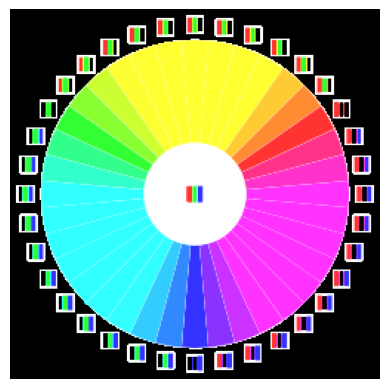

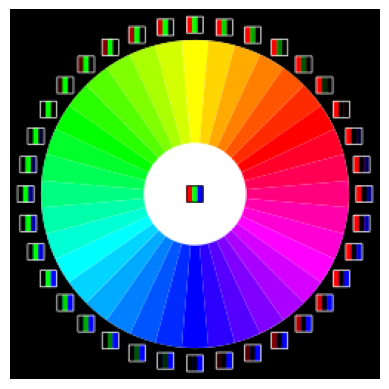

In [25]:
# load a random images, and use the function to tranform and show it

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO


def transform_image(image_url):
    try:
        response = requests.get(image_url, stream=True)
        response.raise_for_status()  # Raise an exception for bad status codes
        img = Image.open(BytesIO(response.content))
        img = img.convert("RGB") # Ensure the image is in RGB format

        # Get image dimensions
        width, height = img.size

        # Create a new image with the same dimensions
        transformed_img = Image.new("RGB", (width, height))

        # Iterate over each pixel
        for x in range(width):
            for y in range(height):
                r, g, b = img.getpixel((x, y))
                h, s, i = rgb_to_hsi(r, g, b)

                # Example transformation: Increase intensity and reduce saturation
                new_i = min(1, i * 1.2) # Increase intensity by 20% (cap at 1.0)
                new_s = max(0,s*0.8) # Decrease saturation by 20% (minimum 0.0)

                # Convert back to RGB
                def hsi_to_rgb(h, s, i):
                    # Convert HSI to RGB (0 ≤ H < 360°, 0 ≤ S,I ≤ 1)
                    h = np.deg2rad(h)
                    if h < 2*np.pi/3:
                        b = i * (1 - s)
                        r = i * (1 + s*np.cos(h)/np.cos(np.pi/3 - h))
                        g = 3*i - (r + b)
                    elif h < 4*np.pi/3:
                        h -= 2*np.pi/3
                        r = i * (1 - s)
                        g = i * (1 + s*np.cos(h)/np.cos(np.pi/3 - h))
                        b = 3*i - (r + g)
                    else:
                        h -= 4*np.pi/3
                        g = i * (1 - s)
                        b = i * (1 + s*np.cos(h)/np.cos(np.pi/3 - h))
                        r = 3*i - (g + b)

                    # Clip values to [0,1] and scale to [0,255]
                    return tuple(int(255 * np.clip(x, 0, 1)) for x in (r, g, b))

                new_r, new_g, new_b = hsi_to_rgb(h * 360, new_s, new_i)
                transformed_img.putpixel((x, y), (new_r, new_g, new_b))

        return transformed_img , img

    except requests.exceptions.RequestException as e:
        print(f"Error downloading image: {e}")
        return None
    except Exception as e:
        print(f"Error processing image: {e}")
        return None

# Example usage
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/RGB_color_wheel_10.svg/250px-RGB_color_wheel_10.svg.png"  # Replace with your image URL

transformed_image ,img = transform_image(image_url)

if transformed_image:
    plt.imshow(transformed_image)
    plt.axis('off')
    plt.show()

    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [ ]:
# psedudo color image - playing with the channels that build an image to inhance are insert detailes - adinf a nir channel  insted of red to highlight elemnts

In [ ]:
#color modells, (rgb,grayscale,hsu...), color space convertion, color histograms, colort enhancement, colorcorerection, color filters

In [ ]:
# color image sharpning - a process to enhcnce clarity or details by emphasizing edges and fine feature.

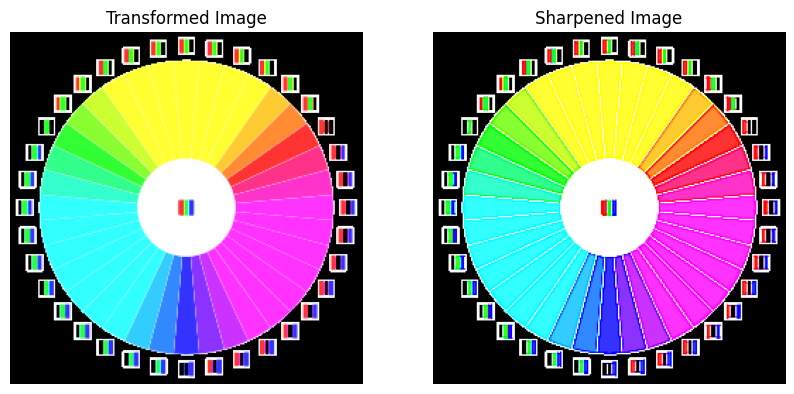

In [49]:
# prompt: color image sharpning - a process to enhcnce clarity or details by emphasizing edges and fine feature.

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO
# ... (rest of your existing code)


def sharpen_image(image):
    """Sharpens an image using a kernel-based approach."""
    # Convert the image to a NumPy array
    image_array = np.array(image)

    # Define a sharpening kernel (Laplacian operator)
    kernel = np.array([[-1, -1, -1],
                       [-1, 9, -1],
                       [-1, -1, -1]])

    # Apply the kernel to the image using convolution
    sharpened_array = np.zeros_like(image_array, dtype=float)
    for channel in range(3):  # Process each color channel (RGB)
        sharpened_array[:,:,channel] = convolve2d(image_array[:,:,channel], kernel, mode='same', boundary='symm')

    # Clip values to the valid range [0, 255] and convert to uint8
    sharpened_array = np.clip(sharpened_array, 0, 255).astype(np.uint8)

    # Convert the NumPy array back to a PIL Image
    sharpened_image = Image.fromarray(sharpened_array)

    return sharpened_image

from scipy.signal import convolve2d

# Example usage (assuming 'transformed_image' is your previously processed image)
if transformed_image:
    sharpened_image = sharpen_image(transformed_image)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(transformed_image)
    plt.title("Transformed Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(sharpened_image)
    plt.title("Sharpened Image")
    plt.axis('off')

    plt.show()